#Harward Jena Flowers dataset

##Step 1: Import Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
print(tf.__version__)

1.14.0


##Step 2: Import Data

####Split the imgaedata into Train and Test folder

In [0]:
import os, os.path, shutil
import random

# train/valid split
def creatsplit(inputdir):
        pathDir = os.listdir(inputdir)       
        split=int(len(pathDir)*0.3) 
        sample = random.sample(pathDir, split)  
        for name in sample:
                shutil.move(inputdir+name, outputdir+name)
        return


inputdir = "/Users/vivek/Documents/DL/JF30/train/"    # path where images originally in
outputdir = "/Users/vivek/Documents/DL/JF30/test/"   # path where validation data go to
creatsplit(inputdir)
    

####Create folder inside Train dataset according to their classLabels

In [0]:
# classification inside train dataset
traindf = "/Users/vivek/Documents/DL/JF30/train/"
classLabels = open("/Users/vivek/Documents/DL/JF30/classlabels.txt")

images_train = [f for f in os.listdir(traindf) if os.path.isfile(os.path.join(traindf, f))]
  
for line in classLabels:
    folderName = line.split(',')[1]
    folderName = int(folderName)
    folderName = str(folderName)
    newPath = os.path.join(traindf, folderName)
    for image in images_train:
        if image == line.split(',')[0]:
            if os.path.exists(newPath) == False:
                os.makedirs(newPath)
            oldImagePath = os.path.join(traindf, image)
            shutil.move(oldImagePath, newPath)


####Create folder inside Test dataset according to their classLabels

In [0]:
# classification inside test dataset
testdf = "/Users/vivek/Documents/DL/JF30/test/"
classLabels = open("/Users/vivek/Documents/DL/JF30/classlabels.txt")

images_valid = [ff for ff in os.listdir(testdf) if os.path.isfile(os.path.join(testdf, ff))]
  
for line in classLabels:
    folder_name = line.split(',')[1]
    folder_name = int(folder_name)
    folder_name = str(folder_name)
    new_path = os.path.join(testdf, folder_name)
    for image in images_valid:
        if image == line.split(',')[0]:
            if os.path.exists(new_path) == False:
                os.makedirs(new_path)
            oldImage_path = os.path.join(testdf, image)
            shutil.move(oldImage_path, new_path)

####Mount Drive to access the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#copied it to collaboratory
!cp "/content/drive/My Drive/JF30.zip" "JF30.zip"

#unzipped
import zipfile
zip_ref = zipfile.ZipFile('JF30.zip', 'r')
zip_ref.extractall('JF30') # unzip directory
zip_ref.close()

##Step 3: Preprocess 

In [0]:
train_dir = '/content/JF30/JF30/train/'
test_dir = '/content/JF30/JF30/test/'
image_size = 64

In [0]:
#Training data with augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Batchsize fixed according to the system RAM
train_batchsize = 30
tst_batchsize = 10

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
# Data Generator for Test data
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_size, image_size),
        batch_size=tst_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1036 images belonging to 30 classes.
Found 443 images belonging to 30 classes.


#### Baseline

In [0]:
classlabels= pd.read_csv("classlabels.txt", sep=",")
classlabels.columns = ["Image", "Class"]
baseline = classlabels['Class'].value_counts() * 100 / len(classlabels['Class'])
print("Baseline is:",baseline[6])

Baseline is: 4.7361299052774015


##Step 4: Build a CNN  Model

In [0]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output classes are 30
model.add(Dense(30))
model.add(Activation('softmax'))



W0713 05:43:54.566454 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0713 05:43:54.608657 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 05:43:54.617518 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0713 05:43:54.677572 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0713 05:43:54.680917 140476071466880 deprecation_wrapp

## Step 5: Fit Model

In [0]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=20,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
      verbose=1)


W0713 05:44:27.137756 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 05:44:27.153086 140476071466880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0713 05:44:27.292404 140476071466880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
35/34 [==============================] - 46s 1s/step - loss: 3.3718 - acc: 0.0616 - val_loss: 3.3148 - val_acc: 0.0767
Epoch 2/20
35/34 [==============================] - 40s 1s/step - loss: 3.3021 - acc: 0.0769 - val_loss: 3.1968 - val_acc: 0.0790
Epoch 3/20
35/34 [==============================] - 39s 1s/step - loss: 3.1341 - acc: 0.1129 - val_loss: 3.0105 - val_acc: 0.1038
Epoch 4/20
35/34 [==============================] - 40s 1s/step - loss: 3.0300 - acc: 0.1075 - val_loss: 2.8916 - val_acc: 0.1964
Epoch 5/20
35/34 [==============================] - 40s 1s/step - loss: 2.9121 - acc: 0.1319 - val_loss: 2.7999 - val_acc: 0.1896
Epoch 6/20
35/34 [==============================] - 40s 1s/step - loss: 2.8640 - acc: 0.1379 - val_loss: 2.7058 - val_acc: 0.1761
Epoch 7/20
35/34 [==============================] - 40s 1s/step - loss: 2.7687 - acc: 0.1666 - val_loss: 2.6027 - val_acc: 0.2438
Epoch 8/20
35/34 [==============================] - 40s 1s/step - loss: 2.6984 - acc: 0.15

## Step 6: Plot Results

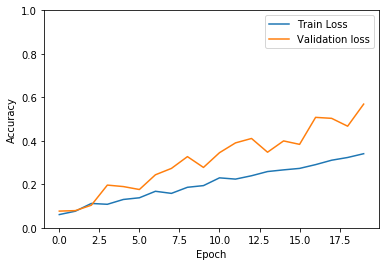

In [0]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']),
           label = 'Validation loss')
  plt.legend()
  plt.ylim([0, 1])

plot_history(history)

##Step 7: Build a Fine-Tuned  Model of VGG

In [0]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)




# Create the model
model_vgg = models.Sequential()
# Add the vgg convolutional base model
model_vgg.add(vgg_conv)
# Add new layers
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(512, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(30, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7fc2e6feed68> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6feeb38> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6feeeb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc2e6fee198> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6fd8a58> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6fac8d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc2e6f449e8> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6f44b38> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6f567f0> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6f057f0> False
<keras.layers.pooling.MaxPooling2D object at 0x7fc2e6f16e80> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6f16400> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6ec79e8> False
<keras.layers.convolutional.Conv2D object at 0x7fc2e6edec50> F

## Step 8: Fit Fine-Tuned  VGG Model

In [0]:
# Compile the model
model_vgg.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Train the Model
history = model_vgg.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=8,
      validation_data=test_generator,
      validation_steps=test_generator.samples/test_generator.batch_size,
      verbose=1)





Epoch 1/8
35/34 [==============================] - 93s 3s/step - loss: 3.3160 - acc: 0.0932 - val_loss: 2.8800 - val_acc: 0.3251
Epoch 2/8
35/34 [==============================] - 84s 2s/step - loss: 2.8839 - acc: 0.2097 - val_loss: 2.5195 - val_acc: 0.4312
Epoch 3/8
35/34 [==============================] - 85s 2s/step - loss: 2.5567 - acc: 0.3261 - val_loss: 2.2323 - val_acc: 0.5418
Epoch 4/8
35/34 [==============================] - 84s 2s/step - loss: 2.2654 - acc: 0.4015 - val_loss: 2.0010 - val_acc: 0.5847
Epoch 5/8
35/34 [==============================] - 84s 2s/step - loss: 2.0964 - acc: 0.4579 - val_loss: 1.7991 - val_acc: 0.6411
Epoch 6/8
35/34 [==============================] - 84s 2s/step - loss: 1.9242 - acc: 0.4955 - val_loss: 1.6387 - val_acc: 0.6637
Epoch 7/8
35/34 [==============================] - 85s 2s/step - loss: 1.7467 - acc: 0.5535 - val_loss: 1.5218 - val_acc: 0.6727
Epoch 8/8
35/34 [==============================] - 85s 2s/step - loss: 1.6540 - acc: 0.5638 - val

## Step 9: Plot Results

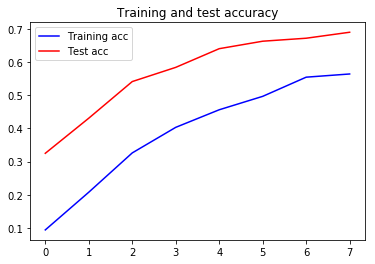

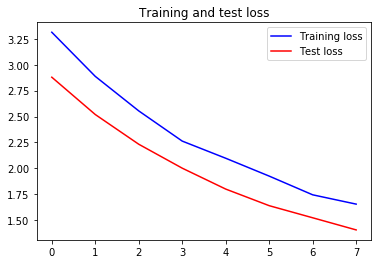

In [0]:
# Plot the accuracy and loss curves
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Test acc')
plt.title('Training and test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.title('Training and test loss')
plt.legend()

plt.show()

In [0]:
history.history

{'acc': [0.09362934749127585,
  0.20752896233299983,
  0.3262548338492405,
  0.4034749098611154,
  0.4565637126622513,
  0.49710425406579345,
  0.5550193150588905,
  0.5646718228990967],
 'loss': [3.3144315412145784,
  2.8880023882656025,
  2.5543695016257093,
  2.2626410207232914,
  2.096930919466792,
  1.9244040193244758,
  1.7436251904973652,
  1.6536897600387515],
 'val_acc': [0.32505643522497224,
  0.43115124291410295,
  0.5417607225158144,
  0.5846501124968109,
  0.6410835212428737,
  0.6636568866922409,
  0.6726862303492178,
  0.6907449195132029],
 'val_loss': [2.8799573820815936,
  2.5194899890546605,
  2.232281487628515,
  2.0010357757454265,
  1.799082395858205,
  1.6387004020117206,
  1.5217604557762834,
  1.404469945764434]}